# 3D Visualization of HJET Magnet (Python Translation)
This notebook is an automatic translation of `xzy_sketch_3D_det250.m` from MATLAB to Python.

Libraries used:
- numpy
- matplotlib (3D)


In [110]:
#%matplotlib notebook
# For interactive 3D rotation in Jupyter, use:
%matplotlib widget
# (requires: pip install ipympl)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Parameters (translated from MATLAB)

In [111]:
# Parameters
r_det = 250      # detector radius [mm]
r_det_2nd = 255      # detector radius [mm]
detSize = 100    # detector square size [mm]
detCol = [1, 0, 1]  # magenta
detCol_2nd = [0.7, 0.7, 0.7]  # light gray
d = 80           # coil offset (centerline) [mm]
a = 20           # coil cross section side [mm]
L_coil = 66.2    # coil loop side length [mm]
s = 33.1         # half spacing (L_coil/2) [mm]
coilCol = [0, 0, 1]  # blue

r_circle = 50    # inner circle radius [mm]
oct_R = 100 / np.cos(np.radians(22.5))  # octagon radius

xlimv = 350
ylimv = 350
zlimv = 250

fs1 = 12
fs2 = 14

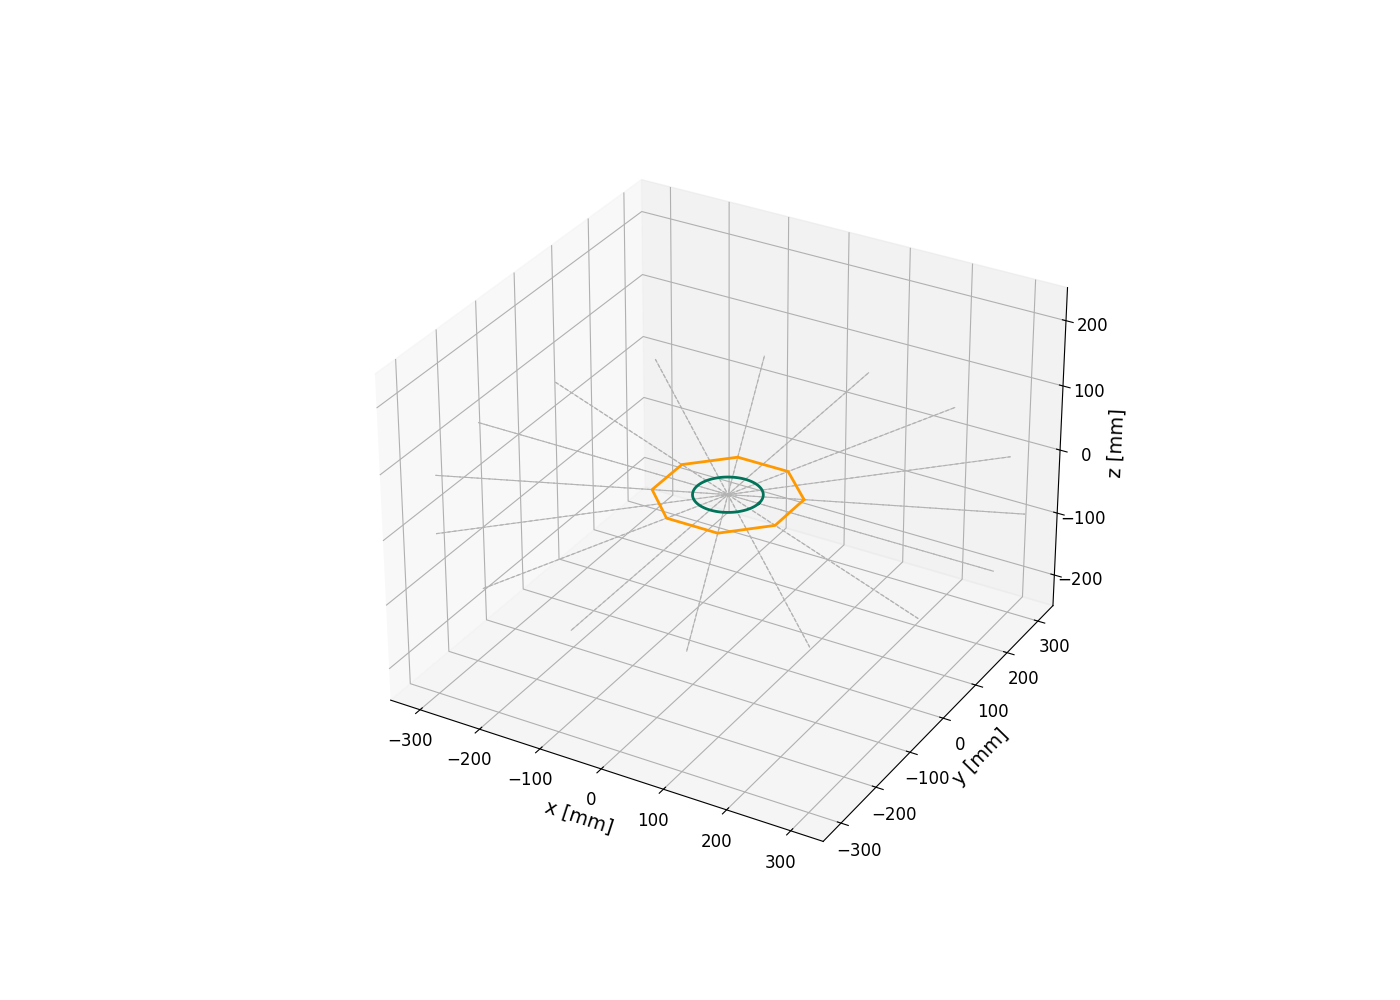

In [112]:
# Create figure and 3D axes
fig = plt.figure(figsize=(14, 10), facecolor='w')
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-xlimv, xlimv])
ax.set_ylim([-ylimv, ylimv])
ax.set_zlim([-zlimv, zlimv])

ax.set_xlabel('x [mm]', fontsize=fs2)
ax.set_ylabel('y [mm]', fontsize=fs2)
ax.set_zlabel('z [mm]', fontsize=fs2)
ax.tick_params(labelsize=fs1)

# 22.5° construction lines in xy-plane at z=0
L = 1.2 * max(xlimv, ylimv)
angles = np.arange(0, 360, 22.5)
dashColor = [0.7, 0.7, 0.7]

for th in angles:
    u = np.array([np.cos(np.radians(th)), np.sin(np.radians(th))])
    p1 = -L * u
    p2 = +L * u
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [0, 0], 
            '--', color=dashColor, linewidth=0.8)

# Inner circle at z=0
t = np.linspace(0, 2*np.pi, 100)
ax.plot(r_circle*np.cos(t), r_circle*np.sin(t), np.zeros_like(t),
        color=[0, 0.45, 0.35], linewidth=2.0)

# Octagon at z=0
k = np.arange(8)
phi0 = 22.5
x8 = oct_R * np.cos(np.radians(phi0 + 45*k))
y8 = oct_R * np.sin(np.radians(phi0 + 45*k))
x8 = np.append(x8, x8[0])
y8 = np.append(y8, y8[0])
ax.plot(x8, y8, np.zeros_like(x8), '-', color=[1.0, 0.6, 0.0], linewidth=2.0)


## Helper functions

In [113]:

def draw_coil_leg(ax, center, width, height, length, direction, color):
    """Draw a rectangular coil leg"""
    cx, cy, cz = center
    half_len = length / 2
    half_w = width / 2
    half_h = height / 2
    
    if direction == 'z':
        corners = np.array([
            [cx-half_w, cy-half_h, cz-half_len],
            [cx+half_w, cy-half_h, cz-half_len],
            [cx+half_w, cy+half_h, cz-half_len],
            [cx-half_w, cy+half_h, cz-half_len],
            [cx-half_w, cy-half_h, cz+half_len],
            [cx+half_w, cy-half_h, cz+half_len],
            [cx+half_w, cy+half_h, cz+half_len],
            [cx-half_w, cy+half_h, cz+half_len]
        ])
    
    faces = [
        [0, 1, 2, 3],  # bottom
        [4, 5, 6, 7],  # top
        [0, 1, 5, 4],  # front
        [1, 2, 6, 5],  # right
        [2, 3, 7, 6],  # back
        [3, 0, 4, 7]   # left
    ]
    
    poly = [[corners[i] for i in face] for face in faces]
    collection = Poly3DCollection(poly, facecolors=color, alpha=0.3, 
                                  edgecolors=color, linewidths=1.5)
    ax.add_collection3d(collection)

def draw_connector(ax, p1, p2, width, color):
    """Draw rectangular connector between two points"""
    hw = width / 2
    p1 = np.array(p1)
    p2 = np.array(p2)
    
    v = p2 - p1
    length = np.linalg.norm(v)
    v = v / length
    
    if abs(v[2]) < 0.9:
        u1 = np.cross(v, [0, 0, 1])
    else:
        u1 = np.cross(v, [1, 0, 0])
    u1 = u1 / np.linalg.norm(u1)
    u2 = np.cross(v, u1)
    u2 = u2 / np.linalg.norm(u2)
    
    c1 = np.array([
        p1 - hw*u1 - hw*u2,
        p1 + hw*u1 - hw*u2,
        p1 + hw*u1 + hw*u2,
        p1 - hw*u1 + hw*u2
    ])
    
    c2 = np.array([
        p2 - hw*u1 - hw*u2,
        p2 + hw*u1 - hw*u2,
        p2 + hw*u1 + hw*u2,
        p2 - hw*u1 + hw*u2
    ])
    
    corners = np.vstack([c1, c2])
    
    faces = [
        [0, 1, 2, 3],  # end 1
        [4, 5, 6, 7],  # end 2
        [0, 1, 5, 4],  # side 1
        [1, 2, 6, 5],  # side 2
        [2, 3, 7, 6],  # side 3
        [3, 0, 4, 7]   # side 4
    ]
    
    poly = [[corners[i] for i in face] for face in faces]
    collection = Poly3DCollection(poly, facecolors=color, alpha=0.3,
                                  edgecolors=color, linewidths=1.5)
    ax.add_collection3d(collection)

def draw_detector(ax, center, tangent, size, color):
    """Draw detector as thin square plate"""
    cx, cy, cz = center
    tx, ty = tangent
    
    hs = size / 2  # half-size = 50 mm
    thickness = 1
    ht = thickness / 2
    
    rnorm = np.sqrt(cx**2 + cy**2)
    rx = cx / rnorm
    ry = cy / rnorm
    
    corners = np.array([
        [cx - hs*tx - ht*rx, cy - hs*ty - ht*ry, cz - hs],
        [cx + hs*tx - ht*rx, cy + hs*ty - ht*ry, cz - hs],
        [cx + hs*tx - ht*rx, cy + hs*ty - ht*ry, cz + hs],
        [cx - hs*tx - ht*rx, cy - hs*ty - ht*ry, cz + hs],
        [cx - hs*tx + ht*rx, cy - hs*ty + ht*ry, cz - hs],
        [cx + hs*tx + ht*rx, cy + hs*ty + ht*ry, cz - hs],
        [cx + hs*tx + ht*rx, cy + hs*ty + ht*ry, cz + hs],
        [cx - hs*tx + ht*rx, cy - hs*ty + ht*ry, cz + hs]
    ])
    
    faces = [
        [0, 1, 2, 3],  # inner face
        [4, 5, 6, 7],  # outer face
        [0, 1, 5, 4],  # bottom edge
        [1, 2, 6, 5],  # right edge
        [2, 3, 7, 6],  # top edge
        [3, 0, 4, 7]   # left edge
    ]
    
    poly = [[corners[i] for i in face] for face in faces]
    collection = Poly3DCollection(poly, facecolors=color, alpha=0.5,
                                  edgecolors=color, linewidths=2)
    ax.add_collection3d(collection)

## Coil visualization

In [114]:

# By coils (horizontal, at y = ±d)
# Top coil (y = +80)
draw_coil_leg(ax, [-s, d, 0], a, a, L_coil, 'z', coilCol)
draw_coil_leg(ax, [s, d, 0], a, a, L_coil, 'z', coilCol)
draw_connector(ax, [-s-a/2, d, -s], [s+a/2, d, -s], a, coilCol)
draw_connector(ax, [-s-a/2, d, s], [s+a/2, d, s], a, coilCol)

# Bottom coil (y = -80)
draw_coil_leg(ax, [s, -d, 0], a, a, L_coil, 'z', coilCol)
draw_coil_leg(ax, [-s, -d, 0], a, a, L_coil, 'z', coilCol)
draw_connector(ax, [-s-a/2, -d, -s], [s+a/2, -d, -s], a, coilCol)
draw_connector(ax, [-s-a/2, -d, s], [s+a/2, -d, s], a, coilCol)

# Bx coils (vertical, at x = ±d)
# Right coil (x = +80)
draw_coil_leg(ax, [d, -s, 0], a, a, L_coil, 'z', coilCol)
draw_coil_leg(ax, [d, s, 0], a, a, L_coil, 'z', coilCol)
draw_connector(ax, [d, -s-a/2, -s], [d, s+a/2, -s], a, coilCol)
draw_connector(ax, [d, -s-a/2, s], [d, s+a/2, s], a, coilCol)

# Left coil (x = -80)
draw_coil_leg(ax, [-d, s, 0], a, a, L_coil, 'z', coilCol)
draw_coil_leg(ax, [-d, -s, 0], a, a, L_coil, 'z', coilCol)
draw_connector(ax, [-d, -s-a/2, -s], [-d, s+a/2, -s], a, coilCol)
draw_connector(ax, [-d, -s-a/2, s], [-d, s+a/2, s], a, coilCol)


## Detector visualization

In [115]:
# Detectors (6 total) at r = 250 mm
detAngles = [0, 180, 45, 225, 135, 315]

for th in detAngles:
    th_rad = np.radians(th)
    cx = r_det * np.cos(th_rad)
    cy = r_det * np.sin(th_rad)

    cx_2nd = r_det_2nd * np.cos(th_rad)
    cy_2nd = r_det_2nd * np.sin(th_rad)

    rx = np.cos(th_rad)
    ry = np.sin(th_rad)
    tx = -np.sin(th_rad)
    ty = np.cos(th_rad)
    
    draw_detector(ax, [cx, cy, 0], [tx, ty], detSize, detCol)
    draw_detector(ax, [cx_2nd, cy_2nd, 0], [tx, ty], detSize, detCol_2nd)
    
    # Draw acceptance lines from origin to detector corners
    hs = detSize / 2
    
    corners = [
        [cx - hs*tx, cy - hs*ty, -hs],  # bottom-left
        [cx + hs*tx, cy + hs*ty, -hs],  # bottom-right
        [cx + hs*tx, cy + hs*ty, +hs],  # top-right
        [cx - hs*tx, cy - hs*ty, +hs]   # top-left
    ]
    
    lineColor = [0, 0, 0]
    for corner in corners:
        ax.plot([0, corner[0]], [0, corner[1]], [0, corner[2]], 
                ':', color=lineColor, linewidth=1.0)

## Coordinate axes visualization

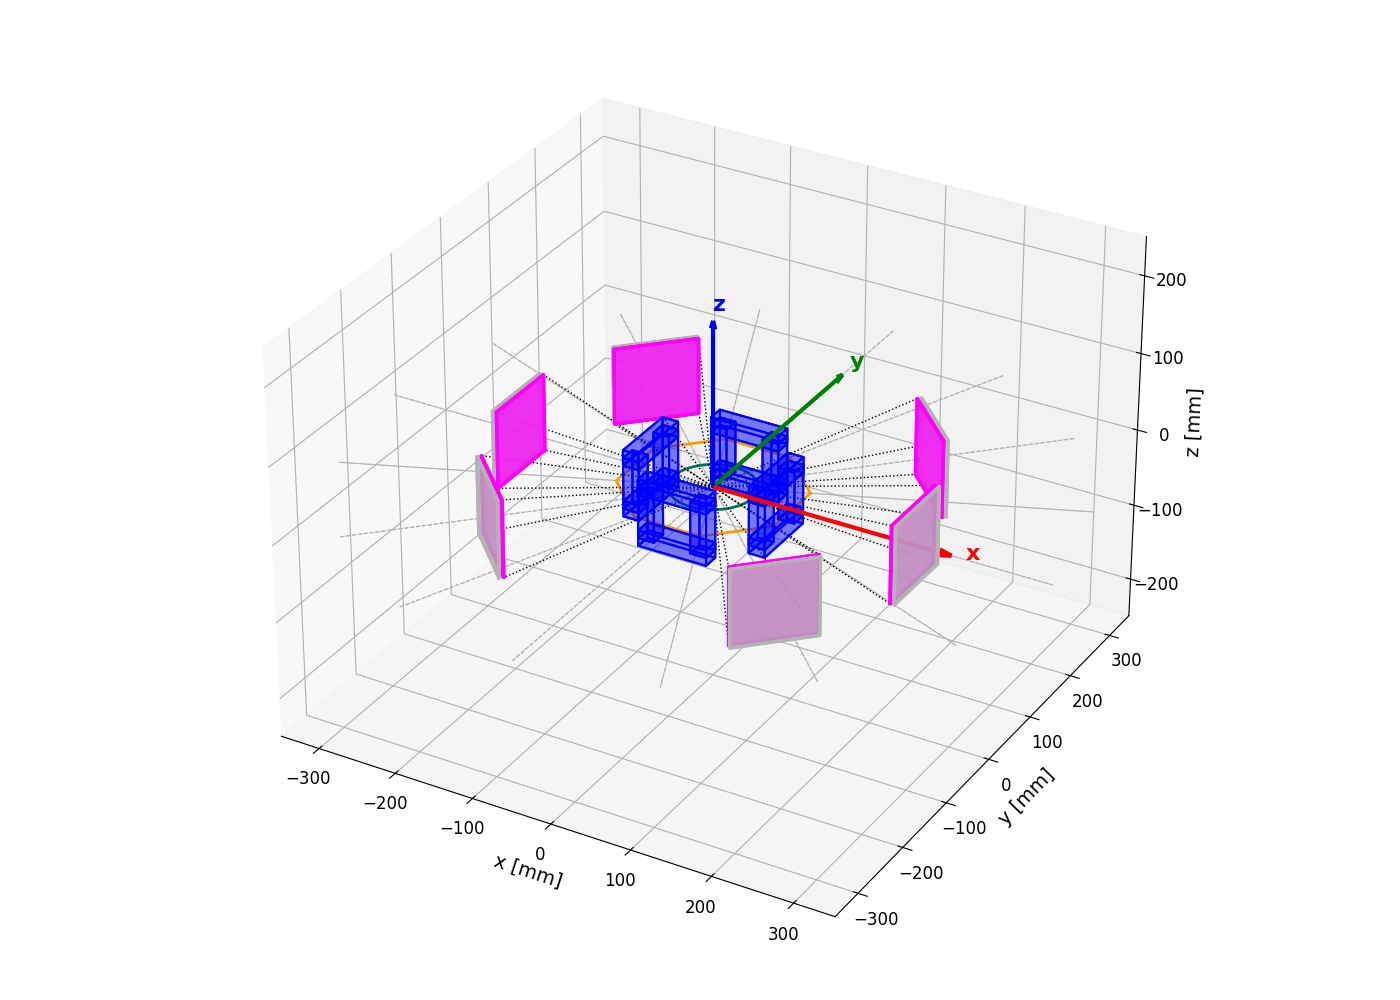

In [116]:
scale = 0.85
ax.quiver(0, 0, 0, xlimv*scale, 0, 0, color='r', arrow_length_ratio=0.05, linewidth=3)
ax.quiver(0, 0, 0, 0, ylimv*scale, 0, color='g', arrow_length_ratio=0.05, linewidth=3)
ax.quiver(0, 0, 0, 0, 0, zlimv*scale, color='b', arrow_length_ratio=0.05, linewidth=3)

ax.text(xlimv*0.90, 0, 0, 'x', fontsize=fs2+2, fontweight='bold', color='r')
ax.text(0, ylimv*0.90, 0, 'y', fontsize=fs2+2, fontweight='bold', color='g')
ax.text(0, 0, zlimv*0.90, 'z', fontsize=fs2+2, fontweight='bold', color='b')

# Set aspect ratio
ax.set_box_aspect([1, 1, 0.7])

plt.tight_layout()
plt.show()